<a href="https://colab.research.google.com/github/BrendonBernardino/machine_learning_tcc/blob/master/Seg_Yolov9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
!pip install -q roboflow supervision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 15.6 MB/s eta 0:00:00


In [20]:
cd /content/drive/MyDrive/Dataset_TCC/yolo_process/yolov9_segmentation/

/content/drive/MyDrive/Dataset_TCC/yolo_process/yolov9_segmentation


In [8]:
!git clone https://github.com/WongKinYiu/yolov9.git

Cloning into 'yolov9'...
remote: Enumerating objects: 781, done.
remote: Total 781 (delta 0), reused 0 (delta 0), pack-reused 781 (from 1)
Receiving objects: 100% (781/781), 3.27 MiB | 8.59 MiB/s, done.
Resolving deltas: 100% (330/330), done.
Updating files: 100% (120/120), done.


In [3]:
cd yolov9

/content/drive/MyDrive/Dataset_TCC/yolo_process/yolov9_segmentation/yolov9


In [13]:
!pip install -r requirements.txt -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.9 MB/s eta 0:00:00


In [10]:
!wget -P /content/drive/MyDrive/Dataset_TCC/yolo_process/yolov9_segmentation/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c-seg.pt

In [4]:
cd panoptic

/content/drive/MyDrive/Dataset_TCC/yolo_process/yolov9_segmentation/yolov9/panoptic


In [3]:
cd /content/drive/MyDrive/Dataset_TCC/yolo_process/yolov9_segmentation/yolov9/segment

/content/drive/MyDrive/Dataset_TCC/yolo_process/yolov9_segmentation/yolov9/segment


In [14]:
!python train.py \
--workers 8 --batch 16 --epochs 100 --img 288 --device 0 --patience 15\
--data /content/drive/MyDrive/Dataset_TCC/yolo_process/yolov9_segmentation/yolov9/data.yaml \
--weights /content/drive/MyDrive/Dataset_TCC/yolo_process/yolov9_segmentation/weights/gelan-c-seg.pt \
--cfg /content/drive/MyDrive/Dataset_TCC/yolo_process/yolov9_segmentation/yolov9/models/segment/gelan-c-seg_custom.yaml \
--hyp /content/drive/MyDrive/Dataset_TCC/yolo_process/yolov9_segmentation/yolov9/data/hyps/hyp.scratch-high.yaml

2025-02-26 15:25:58.647720: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740583558.667484   21279 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740583558.673582   21279 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-26 15:25:58.703736: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: E

In [23]:
!python predict.py \
--img 288 --device 0 \
--data /content/drive/MyDrive/Dataset_TCC/yolo_process/yolov9_segmentation/yolov9/data.yaml \
--weights /content/drive/MyDrive/Dataset_TCC/yolo_process/yolov9_segmentation/yolov9/runs/train-seg/exp2/weights/best.pt \
--source /content/drive/MyDrive/Dataset_TCC/ESP_Slave/images_288/ \
--project /content/drive/MyDrive/Dataset_TCC/yolo_process/segmentation2.yolov9/output \
--name images_espcam2_teste_seg_

segment/predict: weights=['/content/drive/MyDrive/Dataset_TCC/yolo_process/yolov9_segmentation/yolov9/runs/train-seg/exp2/weights/best.pt'], source=/content/drive/MyDrive/Dataset_TCC/ESP_Slave/images_288/, data=/content/drive/MyDrive/Dataset_TCC/yolo_process/yolov9_segmentation/yolov9/data.yaml, imgsz=[288, 288], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/drive/MyDrive/Dataset_TCC/yolo_process/segmentation2.yolov9/output, name=images_espcam2_teste_seg_, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLO 🚀 v0.1-104-g5b1ea9a Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)

/content/drive/MyDrive/Dataset_TCC/yolo_process/yolov9_segmentation/yolov9/models/experimental.py:243: FutureWarning: You are using `torch

In [24]:
!python predict.py \
--img 288 --device 0 \
--data /content/drive/MyDrive/Dataset_TCC/yolo_process/yolov9_segmentation/yolov9/data.yaml \
--weights /content/drive/MyDrive/Dataset_TCC/yolo_process/yolov9_segmentation/yolov9/runs/train-seg/exp2/weights/best.pt \
--source /content/drive/MyDrive/Dataset_TCC/ESP_Slave/ \
--project /content/drive/MyDrive/Dataset_TCC/yolo_process/segmentation2.yolov9/output \
--name images_espcam2_teste_seg_no_resize

segment/predict: weights=['/content/drive/MyDrive/Dataset_TCC/yolo_process/yolov9_segmentation/yolov9/runs/train-seg/exp2/weights/best.pt'], source=/content/drive/MyDrive/Dataset_TCC/ESP_Slave/, data=/content/drive/MyDrive/Dataset_TCC/yolo_process/yolov9_segmentation/yolov9/data.yaml, imgsz=[288, 288], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/drive/MyDrive/Dataset_TCC/yolo_process/segmentation2.yolov9/output, name=images_espcam2_teste_seg_no_resize, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLO 🚀 v0.1-104-g5b1ea9a Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)

/content/drive/MyDrive/Dataset_TCC/yolo_process/yolov9_segmentation/yolov9/models/experimental.py:243: FutureWarning: You are using `torch.l

In [25]:
!python predict.py \
--img 288 --conf-thres 0.75 --device 0 \
--data /content/drive/MyDrive/Dataset_TCC/yolo_process/yolov9_segmentation/yolov9/data.yaml \
--weights /content/drive/MyDrive/Dataset_TCC/yolo_process/yolov9_segmentation/yolov9/runs/train-seg/exp2/weights/best.pt \
--source /content/drive/MyDrive/Dataset_TCC/ESP_Slave/images_288/ \
--project /content/drive/MyDrive/Dataset_TCC/yolo_process/segmentation2.yolov9/output \
--name images_espcam2_teste_seg_288_conf75

segment/predict: weights=['/content/drive/MyDrive/Dataset_TCC/yolo_process/yolov9_segmentation/yolov9/runs/train-seg/exp2/weights/best.pt'], source=/content/drive/MyDrive/Dataset_TCC/ESP_Slave/images_288/, data=/content/drive/MyDrive/Dataset_TCC/yolo_process/yolov9_segmentation/yolov9/data.yaml, imgsz=[288, 288], conf_thres=0.75, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/drive/MyDrive/Dataset_TCC/yolo_process/segmentation2.yolov9/output, name=images_espcam2_teste_seg_288_conf75, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLO 🚀 v0.1-104-g5b1ea9a Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)

/content/drive/MyDrive/Dataset_TCC/yolo_process/yolov9_segmentation/yolov9/models/experimental.py:243: FutureWarning: You are us

In [27]:
!python predict.py \
--img 288 --conf-thres 0.60 --device 0 \
--data /content/drive/MyDrive/Dataset_TCC/yolo_process/yolov9_segmentation/yolov9/data.yaml \
--weights /content/drive/MyDrive/Dataset_TCC/yolo_process/yolov9_segmentation/yolov9/runs/train-seg/exp2/weights/best.pt \
--source /content/drive/MyDrive/Dataset_TCC/ESP_Slave/ \
--project /content/drive/MyDrive/Dataset_TCC/yolo_process/segmentation2.yolov9/output \
--name images_espcam2_teste_seg_conf75

segment/predict: weights=['/content/drive/MyDrive/Dataset_TCC/yolo_process/yolov9_segmentation/yolov9/runs/train-seg/exp2/weights/best.pt'], source=/content/drive/MyDrive/Dataset_TCC/ESP_Slave/, data=/content/drive/MyDrive/Dataset_TCC/yolo_process/yolov9_segmentation/yolov9/data.yaml, imgsz=[288, 288], conf_thres=0.6, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/drive/MyDrive/Dataset_TCC/yolo_process/segmentation2.yolov9/output, name=images_espcam2_teste_seg_conf75, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLO 🚀 v0.1-104-g5b1ea9a Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)

/content/drive/MyDrive/Dataset_TCC/yolo_process/yolov9_segmentation/yolov9/models/experimental.py:243: FutureWarning: You are using `torch.load`

In [6]:
!python predict.py --help

usage: predict.py [-h] [--weights WEIGHTS [WEIGHTS ...]] [--source SOURCE] [--data DATA]
                  [--imgsz IMGSZ [IMGSZ ...]] [--conf-thres CONF_THRES] [--iou-thres IOU_THRES]
                  [--max-det MAX_DET] [--device DEVICE] [--view-img] [--save-txt] [--save-conf]
                  [--save-crop] [--nosave] [--classes CLASSES [CLASSES ...]] [--agnostic-nms]
                  [--augment] [--visualize] [--update] [--project PROJECT] [--name NAME]
                  [--exist-ok] [--line-thickness LINE_THICKNESS] [--hide-labels] [--hide-conf]
                  [--half] [--dnn] [--vid-stride VID_STRIDE] [--retina-masks]

options:
  -h, --help            show this help message and exit
  --weights WEIGHTS [WEIGHTS ...]
                        model path(s)
  --source SOURCE       file/dir/URL/glob/screen/0(webcam)
  --data DATA           (optional) dataset.yaml path
  --imgsz IMGSZ [IMGSZ ...], --img IMGSZ [IMGSZ ...], --img-size IMGSZ [IMGSZ ...]
                        infere

In [71]:
from PIL import Image
W_espcam = 288
H_espcam = 288

IMAGE_PATH = "/content/pic74.jpg"
OUTPUT_PATH = "/content/pic74_resized.jpg"

img = Image.open(IMAGE_PATH)
img_resized = img.resize((W_espcam, H_espcam), Image.Resampling.LANCZOS)
img_resized.save(OUTPUT_PATH)

!python predict.py \
--imgsz 288 --conf-thres 0.60 --device 0 \
--data /content/drive/MyDrive/Dataset_TCC/yolo_process/yolov9_segmentation/yolov9/data.yaml \
--weights /content/drive/MyDrive/Dataset_TCC/yolo_process/yolov9_segmentation/yolov9/runs/train-seg/exp2/weights/best.pt \
--source {OUTPUT_PATH} \
--project /content/drive/MyDrive/Dataset_TCC/yolo_process/segmentation2.yolov9/output2 \
--name teste_area \
--save-txt

segment/predict: weights=['/content/drive/MyDrive/Dataset_TCC/yolo_process/yolov9_segmentation/yolov9/runs/train-seg/exp2/weights/best.pt'], source=/content/pic74_resized.jpg, data=/content/drive/MyDrive/Dataset_TCC/yolo_process/yolov9_segmentation/yolov9/data.yaml, imgsz=[288, 288], conf_thres=0.6, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/drive/MyDrive/Dataset_TCC/yolo_process/segmentation2.yolov9/output2, name=teste_area, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLO 🚀 v0.1-104-g5b1ea9a Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)

/content/drive/MyDrive/Dataset_TCC/yolo_process/yolov9_segmentation/yolov9/models/experimental.py:243: FutureWarning: You are using `torch.load` with `weights_only=False` (the current 

Classe: 1 - Área: 587.01 pixels²
Classe: 1 - Área: 893.99 pixels²
Classe: 1 - Área: 885.51 pixels²
Classe: 1 - Área: 292.51 pixels²
Classe: 1 - Área: 543.99 pixels²
Classe: 1 - Área: 1086.49 pixels²
Área total de comida no cocho (em pixels): 4289.50 pixels²
Nivel de comida/sal: Médio


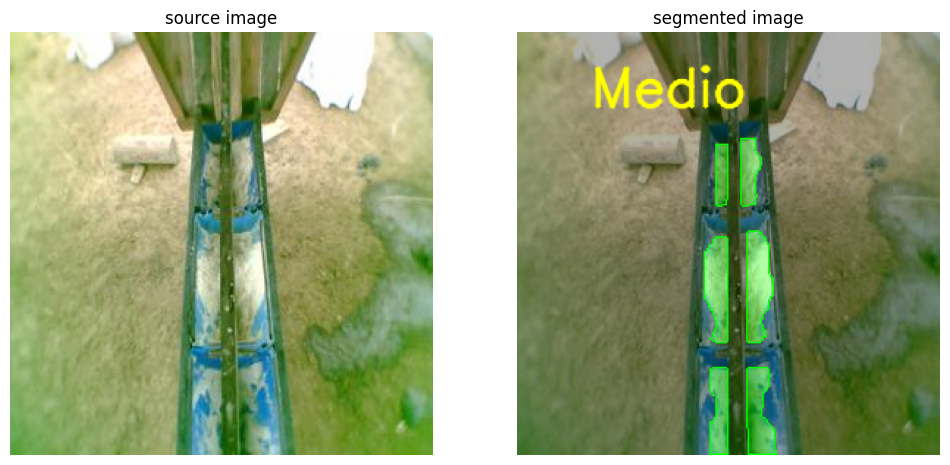

In [54]:
import numpy as np
import supervision as sv
import cv2

# Função para calcular a área pela fórmula de Gauss (multiplica os pares de coord do polígono no sentido anti-horário)
def polygon_area(coords):
    x = np.array(coords[0::2])  # Pega os X
    y = np.array(coords[1::2])  # Pega os Y
    return 0.5 * abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))

img = cv2.imread(OUTPUT_PATH)
img_original = img.copy()

mask = np.zeros_like(img) # Cria máscara preta do mesmo tamanho da imagem

max_area = 5500 #pixels
min_area = 2500 #pixels

txt_path = "/content/drive/MyDrive/Dataset_TCC/yolo_process/segmentation2.yolov9/output2/teste_area11/labels/pic137_resized.txt"
total_area_food_trough = 0

contours = []
occluded_trough = 0
empty_trough = 0

with open(txt_path, "r") as file:
    for line in file:
        data = line.strip().split()  # Divide os valores
        data_coord = list(map(float, line.split()))

        class_id = int(data[0])  # Pos da classe no txt

        coords = data_coord[1:] # Pega apenas os pontos
        coords_pixels = [coords[i] * W_espcam if i % 2 == 0 else coords[i] * H_espcam for i in range(len(coords))] # Converte as coordenadas dos pixels de seg na imagem
        area = polygon_area(coords_pixels) # Calcula area

        points = np.array(data[1:], dtype=np.float32).reshape(-1, 2)  # Converte para float e reorganiza como pares (x, y)


        # Converte coordenadas normalizadas para pixels
        points[:, 0] *= W_espcam  # Multiplica largura
        points[:, 1] *= H_espcam  # Multiplica altura
        points = points.astype(np.int32)  # Converte para inteiros
        coords_pixels = points.astype(np.int32)

        contours.append(points)  # Adiciona à lista de contornos

        if class_id == 2:
          occluded_trough = 1
        if class_id == 0:
          empty_trough = 1

        if class_id == 1:
            total_area_food_trough += area

        print(f"Classe: {class_id} - Área: {area:.2f} pixels²")

print(f"Área total de comida no cocho (em pixels): {total_area_food_trough:.2f} pixels²")
if occluded_trough == 1:
    print("Imagem de cocho com oclusão")
    classification = ""
    # text_color = (0, 255, 255)
elif empty_trough == 1:
    print("Nivel de comida/sal: Vazio")
    classification = "Vazio"
    text_color = (0, 0, 255)  # Vermelho
else:
  if total_area_food_trough > max_area:
      print("Nivel de comida/sal: Cheio")
      classification = "Cheio"
      text_color = (0, 255, 0)  # Verde
  else:
      print("Nivel de comida/sal: Médio")
      classification = "Medio"
      text_color = (0, 255, 255)  # Amarelo
  # else:
  #     print("Nivel de comida/sal: Vazio")
  #     classification = "Vazio"
  #     text_color = (0, 0, 255)  # Vermelho

overlay_or_not = img_original.copy()
if empty_trough != 1 and occluded_trough != 1:
  # Desenhar as máscaras na imagem
  cv2.polylines(img, contours, isClosed=True, color=(0, 255, 0), thickness=1)  # Borda verde
  cv2.fillPoly(mask, contours, (0, 255, 0))  # Máscara preenchida

  # Criar uma sobreposição da máscara na imagem original
  overlay_or_not = cv2.addWeighted(img, 0.7, mask, 0.3, 0)  # Ajuste dos pesos para transparência

cv2.putText(
    overlay_or_not, classification,
    (50, 50), cv2.FONT_HERSHEY_SIMPLEX,
    1.2, text_color, 2, cv2.LINE_AA
)

sv.plot_images_grid(
    images=[img_original, overlay_or_not],
    grid_size=(1, 2),
    titles=['source image', 'segmented image']
)

Classe: 1 - Área: 447.51 pixels²
Classe: 1 - Área: 1088.01 pixels²
Classe: 1 - Área: 705.50 pixels²
Classe: 1 - Área: 1725.50 pixels²
Classe: 1 - Área: 882.51 pixels²
Classe: 1 - Área: 1211.50 pixels²
Área total de comida no cocho (em pixels): 6060.52 pixels²
Nivel de comida/sal: Cheio


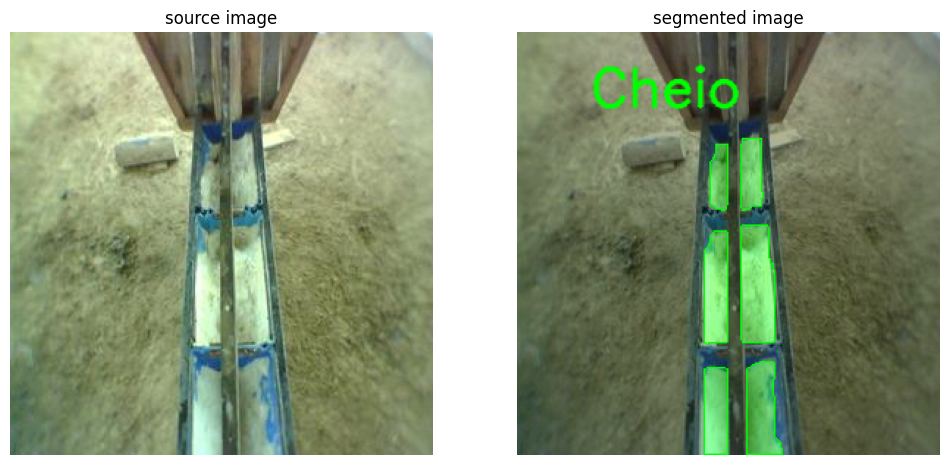

In [56]:
img = cv2.imread(OUTPUT_PATH)
img_original = img.copy()

mask = np.zeros_like(img) # Cria máscara preta do mesmo tamanho da imagem

max_area = 5500 #pixels
min_area = 2500 #pixels

txt_path = "/content/drive/MyDrive/Dataset_TCC/yolo_process/segmentation2.yolov9/output2/teste_area12/labels/pic57_resized.txt"
total_area_food_trough = 0

contours = []
occluded_trough = 0
empty_trough = 0

with open(txt_path, "r") as file:
    for line in file:
        data = line.strip().split()  # Divide os valores
        data_coord = list(map(float, line.split()))

        class_id = int(data[0])  # Pos da classe no txt

        coords = data_coord[1:] # Pega apenas os pontos
        coords_pixels = [coords[i] * W_espcam if i % 2 == 0 else coords[i] * H_espcam for i in range(len(coords))] # Converte as coordenadas dos pixels de seg na imagem
        area = polygon_area(coords_pixels) # Calcula area

        points = np.array(data[1:], dtype=np.float32).reshape(-1, 2)  # Converte para float e reorganiza como pares (x, y)


        # Converte coordenadas normalizadas para pixels
        points[:, 0] *= W_espcam  # Multiplica largura
        points[:, 1] *= H_espcam  # Multiplica altura
        points = points.astype(np.int32)  # Converte para inteiros
        coords_pixels = points.astype(np.int32)

        contours.append(points)  # Adiciona à lista de contornos

        if class_id == 2:
          occluded_trough = 1
        if class_id == 0:
          empty_trough = 1

        if class_id == 1:
            total_area_food_trough += area

        print(f"Classe: {class_id} - Área: {area:.2f} pixels²")

print(f"Área total de comida no cocho (em pixels): {total_area_food_trough:.2f} pixels²")
if occluded_trough == 1:
    print("Imagem de cocho com oclusão")
    classification = ""
    # text_color = (0, 255, 255)
elif empty_trough == 1:
    print("Nivel de comida/sal: Vazio")
    classification = "Vazio"
    text_color = (0, 0, 255)  # Vermelho
else:
  if total_area_food_trough > max_area:
      print("Nivel de comida/sal: Cheio")
      classification = "Cheio"
      text_color = (0, 255, 0)  # Verde
  else:
      print("Nivel de comida/sal: Médio")
      classification = "Medio"
      text_color = (0, 255, 255)  # Amarelo
  # else:
  #     print("Nivel de comida/sal: Vazio")
  #     classification = "Vazio"
  #     text_color = (0, 0, 255)  # Vermelho

overlay_or_not = img_original.copy()
if empty_trough != 1 and occluded_trough != 1:
  # Desenhar as máscaras na imagem
  cv2.polylines(img, contours, isClosed=True, color=(0, 255, 0), thickness=1)  # Borda verde
  cv2.fillPoly(mask, contours, (0, 255, 0))  # Máscara preenchida

  # Criar uma sobreposição da máscara na imagem original
  overlay_or_not = cv2.addWeighted(img, 0.7, mask, 0.3, 0)  # Ajuste dos pesos para transparência

cv2.putText(
    overlay_or_not, classification,
    (50, 50), cv2.FONT_HERSHEY_SIMPLEX,
    1.2, text_color, 2, cv2.LINE_AA
)

sv.plot_images_grid(
    images=[img_original, overlay_or_not],
    grid_size=(1, 2),
    titles=['source image', 'segmented image']
)

Classe: 0 - Área: 16694.52 pixels²
Área total de comida no cocho (em pixels): 0.00 pixels²
Nivel de comida/sal: Vazio


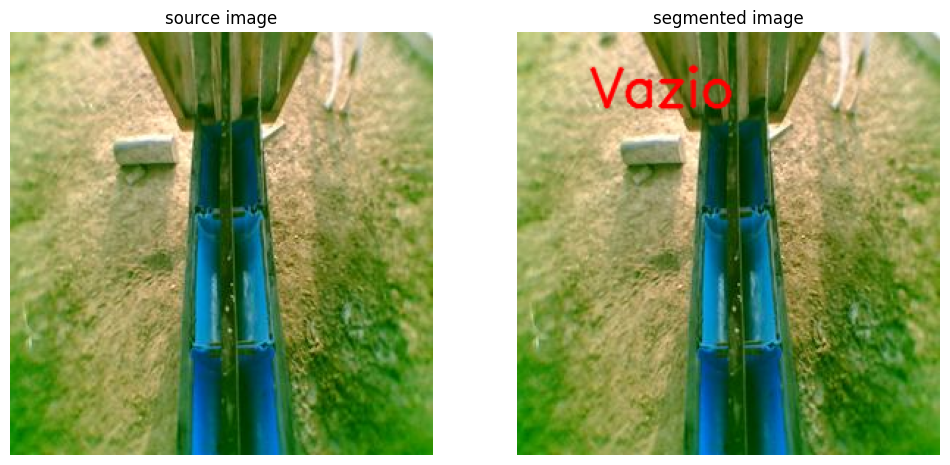

In [70]:
img = cv2.imread(OUTPUT_PATH)
img_original = img.copy()

mask = np.zeros_like(img) # Cria máscara preta do mesmo tamanho da imagem

max_area = 5500 #pixels
min_area = 2500 #pixels

txt_path = "/content/drive/MyDrive/Dataset_TCC/yolo_process/segmentation2.yolov9/output2/teste_area13/labels/pic192_resized.txt"
total_area_food_trough = 0

contours = []
occluded_trough = 0
empty_trough = 0

with open(txt_path, "r") as file:
    for line in file:
        data = line.strip().split()  # Divide os valores
        data_coord = list(map(float, line.split()))

        class_id = int(data[0])  # Pos da classe no txt

        coords = data_coord[1:] # Pega apenas os pontos
        coords_pixels = [coords[i] * W_espcam if i % 2 == 0 else coords[i] * H_espcam for i in range(len(coords))] # Converte as coordenadas dos pixels de seg na imagem
        area = polygon_area(coords_pixels) # Calcula area

        points = np.array(data[1:], dtype=np.float32).reshape(-1, 2)  # Converte para float e reorganiza como pares (x, y)


        # Converte coordenadas normalizadas para pixels
        points[:, 0] *= W_espcam  # Multiplica largura
        points[:, 1] *= H_espcam  # Multiplica altura
        points = points.astype(np.int32)  # Converte para inteiros
        coords_pixels = points.astype(np.int32)

        contours.append(points)  # Adiciona à lista de contornos

        if class_id == 2:
          occluded_trough = 1
        if class_id == 0:
          empty_trough = 1

        if class_id == 1:
            total_area_food_trough += area

        print(f"Classe: {class_id} - Área: {area:.2f} pixels²")

print(f"Área total de comida no cocho (em pixels): {total_area_food_trough:.2f} pixels²")
if occluded_trough == 1:
    print("Imagem de cocho com oclusão")
    classification = ""
    # text_color = (0, 255, 255)
elif empty_trough == 1:
    print("Nivel de comida/sal: Vazio")
    classification = "Vazio"
    text_color = (0, 0, 255)  # Vermelho
else:
  if total_area_food_trough > max_area:
      print("Nivel de comida/sal: Cheio")
      classification = "Cheio"
      text_color = (0, 255, 0)  # Verde
  else:
      print("Nivel de comida/sal: Médio")
      classification = "Medio"
      text_color = (0, 255, 255)  # Amarelo
  # else:
  #     print("Nivel de comida/sal: Vazio")
  #     classification = "Vazio"
  #     text_color = (0, 0, 255)  # Vermelho

overlay_or_not = img_original.copy()
if empty_trough != 1 and occluded_trough != 1:
  # Desenhar as máscaras na imagem
  cv2.polylines(img, contours, isClosed=True, color=(0, 255, 0), thickness=1)  # Borda verde
  cv2.fillPoly(mask, contours, (0, 255, 0))  # Máscara preenchida

  # Criar uma sobreposição da máscara na imagem original
  overlay_or_not = cv2.addWeighted(img, 0.7, mask, 0.3, 0)  # Ajuste dos pesos para transparência

cv2.putText(
    overlay_or_not, classification,
    (50, 50), cv2.FONT_HERSHEY_SIMPLEX,
    1.2, text_color, 2, cv2.LINE_AA
)

sv.plot_images_grid(
    images=[img_original, overlay_or_not],
    grid_size=(1, 2),
    titles=['source image', 'segmented image']
)

Área total de comida no cocho (em pixels): 0.00 pixels²
Imagem de cocho com oclusão


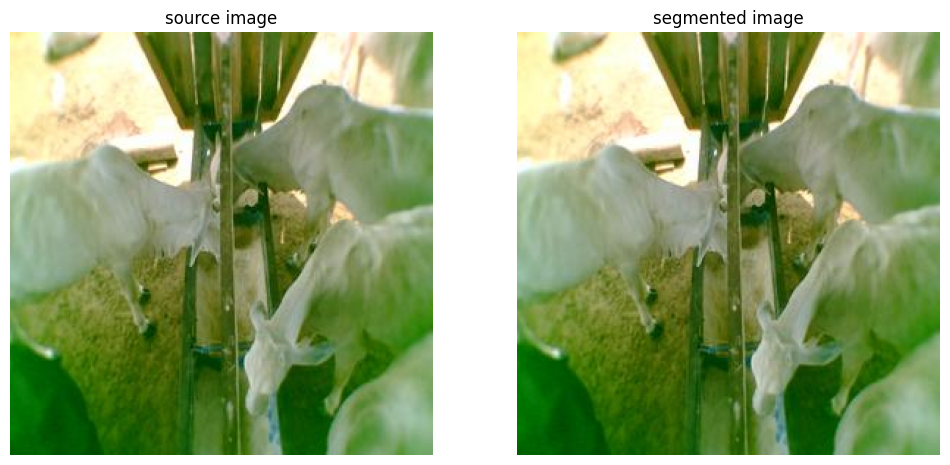

In [73]:
img = cv2.imread(OUTPUT_PATH)
img_original = img.copy()

mask = np.zeros_like(img) # Cria máscara preta do mesmo tamanho da imagem

max_area = 5500 #pixels
min_area = 2500 #pixels

txt_path = "/content/drive/MyDrive/Dataset_TCC/yolo_process/segmentation2.yolov9/output2/teste_area14/labels/pic74_resized.txt"
total_area_food_trough = 0

contours = []
occluded_trough = 0
empty_trough = 0

with open(txt_path, "r") as file:
    for line in file:
        data = line.strip().split()  # Divide os valores
        data_coord = list(map(float, line.split()))

        class_id = int(data[0])  # Pos da classe no txt

        coords = data_coord[1:] # Pega apenas os pontos
        coords_pixels = [coords[i] * W_espcam if i % 2 == 0 else coords[i] * H_espcam for i in range(len(coords))] # Converte as coordenadas dos pixels de seg na imagem
        area = polygon_area(coords_pixels) # Calcula area

        points = np.array(data[1:], dtype=np.float32).reshape(-1, 2)  # Converte para float e reorganiza como pares (x, y)


        # Converte coordenadas normalizadas para pixels
        points[:, 0] *= W_espcam  # Multiplica largura
        points[:, 1] *= H_espcam  # Multiplica altura
        points = points.astype(np.int32)  # Converte para inteiros
        coords_pixels = points.astype(np.int32)

        contours.append(points)  # Adiciona à lista de contornos

        if class_id == 2:
          occluded_trough = 1
        if class_id == 0:
          empty_trough = 1

        if class_id == 1:
            total_area_food_trough += area
            print(f"Classe: {class_id} - Área: {area:.2f} pixels²")

print(f"Área total de comida no cocho (em pixels): {total_area_food_trough:.2f} pixels²")
if occluded_trough == 1:
    print("Imagem de cocho com oclusão")
    classification = ""
    # text_color = (0, 255, 255)
elif empty_trough == 1:
    print("Nivel de comida/sal: Vazio")
    classification = "Vazio"
    text_color = (0, 0, 255)  # Vermelho
else:
  if total_area_food_trough > max_area:
      print("Nivel de comida/sal: Cheio")
      classification = "Cheio"
      text_color = (0, 255, 0)  # Verde
  else:
      print("Nivel de comida/sal: Médio")
      classification = "Medio"
      text_color = (0, 255, 255)  # Amarelo

overlay_or_not = img_original.copy()
if empty_trough != 1 and occluded_trough != 1:
  # Desenha as máscaras na imagem
  cv2.polylines(img, contours, isClosed=True, color=(0, 255, 0), thickness=1)  # Borda verde
  cv2.fillPoly(mask, contours, (0, 255, 0))  # Máscara preenchida

  # Sobreposição da máscara na imagem original
  overlay_or_not = cv2.addWeighted(img, 0.7, mask, 0.3, 0)  # Ajuste dos pesos para transparência

cv2.putText(
    overlay_or_not, classification,
    (50, 50), cv2.FONT_HERSHEY_SIMPLEX,
    1.2, text_color, 2, cv2.LINE_AA
)

sv.plot_images_grid(
    images=[img_original, overlay_or_not],
    grid_size=(1, 2),
    titles=['source image', 'segmented image']
)